In [2]:
#from mpl_toolkits import mplot3d
import pandas as pd
from numpy import array
import numpy as np
import h5py
import mplcursors
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,

    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "computer-modern-roman",

    "figure.dpi": 300,
    "savefig.dpi": 300,
})


CMAPS = plt.colormaps
CMAP = CMAPS['hsv']

h = 0.6774  # co-moving constant


In [24]:
dat = pd.read_pickle('mcconnachie_data.pickle')


In [35]:
filt = dat['M_stars'] < 1e9

m, b = np.polyfit(
    np.log(dat[filt]['M_stars']),
    np.log(dat[filt]['r_h.1']),
    deg=1,
)



x = np.linspace(
    4, 20,
    dat[filt].shape[0],
    dtype=np.float64
)

y = m*x + b

pwr_fit = x, y

dat['beta_r50'] = (
    np.log(dat['r_h.1'])
    - (m * np.log(dat['M_stars']) + b)
)

(
    np.mean(dat[filt]['beta_r50']),
    np.std(dat[filt]['beta_r50']),
    m,
    b
)

(6.281525007747596e-16,
 0.6576002693874021,
 0.18773423127168784,
 -3.682281256530776)

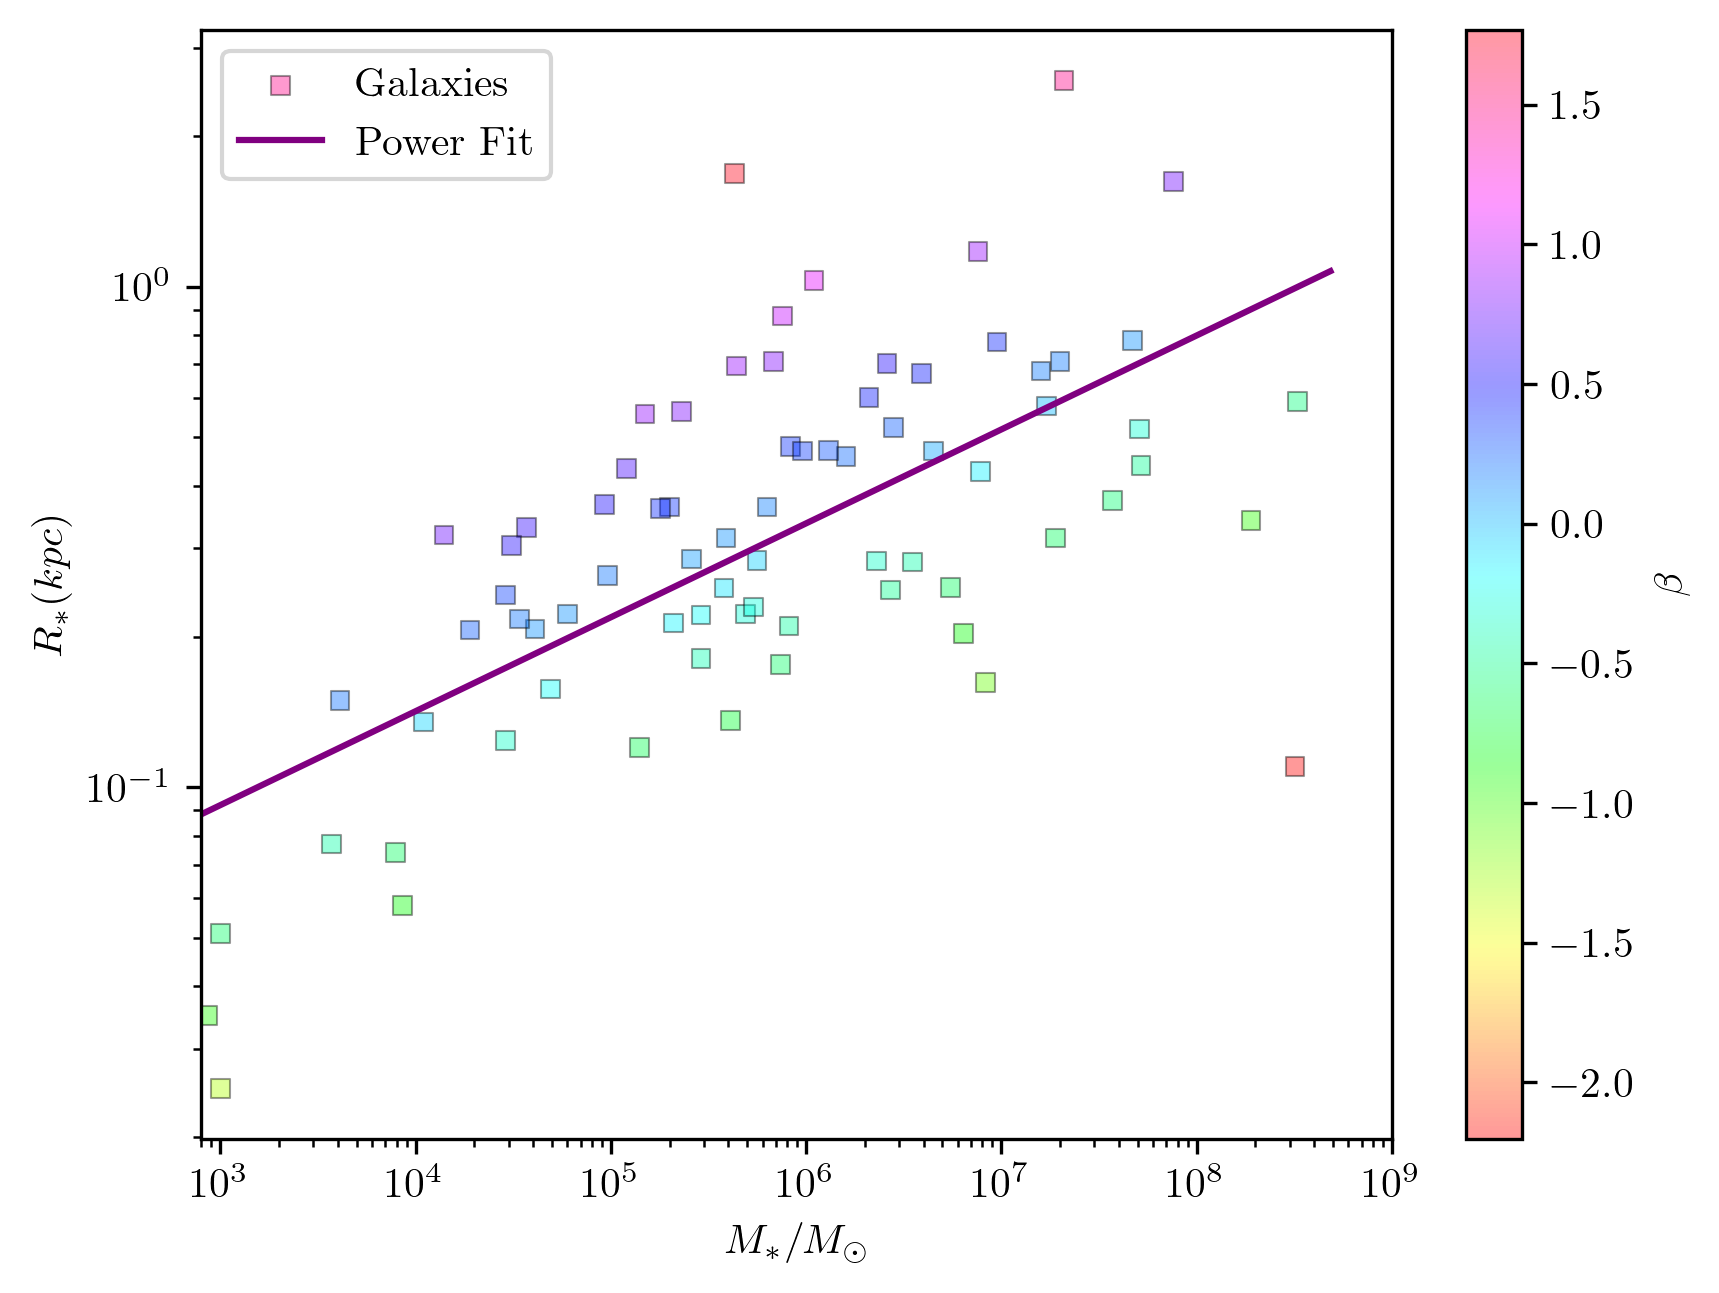

In [37]:

fig = plt.figure()
ax = plt.axes()

ax.set_xscale('log')
ax.set_yscale('log')

d = dat
mask = d['beta_r50'] > -np.inf  # no mask
x, y = d[mask]['M_stars'], d[mask]['r_h.1']

_m = ax.scatter(x, y, alpha=0.4, s=20, marker='s',
                cmap=CMAPS['hsv'], c=d[mask]['beta_r50'], edgecolor='black', linewidth=0.5,
                )
fig.colorbar(_m, ax=ax).set_label(r'$\beta$')

# ax.plot(*lin_fit)
ax.plot(np.exp(pwr_fit[0]), np.exp(pwr_fit[1]), color='purple')
#ax.scatter(sates(x), sates(y), alpha=0.5, s=5)
ax.set_xlim(8e2, 1e9)
# ax.set_ylim(1e0, 3e1)
ax.legend(('Galaxies', 'Power Fit'))
# ax.set_title(r'Stars Mass Size Relation, $R_{50}$')
ax.set_xlabel(r'$M_{*} / M_\odot$')
ax.set_ylabel(r'$R_{*} (kpc)$')
fig.savefig('out.pgf')
fig.savefig('../paper/fig.mccon-size-mass.pgf')


